In [2]:
import pandas as pd
from Bio.Seq import Seq
from Bio import SeqIO
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Annotation completion for UCYN-A proteins per annotaiton tool (%)')

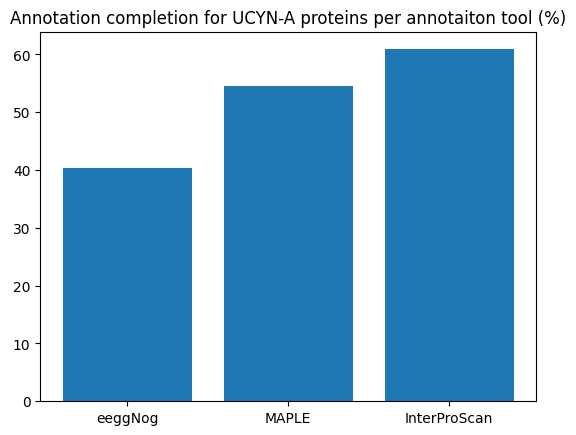

In [4]:
plt.bar(['eeggNog', 'MAPLE', 'InterProScan'], [40.3, 54.5, 60.9])
plt.title('Annotation completion for UCYN-A proteins per annotaiton tool (%)')

In [ ]:
df = pd.read_csv('../results/ucyna_proteins_eggnog.tsv', sep='\t', comment='#', header=None)
df.columns = ["query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"eggNOG_OGs",
"max_annot_lvl",
"COG_cat",
"Description",
"Transferred annotations fields",
"Preferred_name",
"GOs",
"EC",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
]


np.float64(30.50993949870354)

In [6]:
df = pd.read_csv('../results/ucyna_proteins_interpro.tsv', sep='\t')
df.columns = [
    "accession",
    "sequence_md5",
    "sequence_length",
    "analysis",
    "signature_accession",
    "signature_description",
    "start",
    "stop",
    "score",
    "status",
    "date",
    "interpro_accession",
    "interpro_description",
    "go",
    "pathway",
]

In [10]:
(df['pathway'] != "-" ).sum() / len(df) * 100

np.float64(60.68276597808166)

In [12]:
df_missing = pd.read_csv('../results/ucyna_missing_interpro.tsv', sep='\t')
df_missing.columns = [
    "accession",
    "sequence_md5",
    "sequence_length",
    "analysis",
    "signature_accession",
    "signature_description",
    "start",
    "stop",
    "score",
    "status",
    "date",
    "interpro_accession",
    "interpro_description",
    "go",
    "pathway",
]

(df_missing['pathway'] != "-" ).sum() / len(df_missing) * 100

np.float64(60.68276597808166)

In [23]:
pathways.iloc[100]

'MetaCyc:PWY-7884|Reactome:R-BTA-9837999|Reactome:R-CEL-9837999|Reactome:R-HSA-9837999|Reactome:R-MMU-9837999'

20.313249160939748
20.760747962282245
58.92600287677801


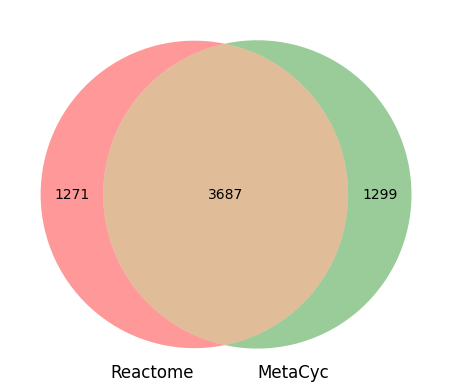

In [21]:
pathways = df[df['pathway'] != "-"]['pathway'] #.map(lambda x: x.split('|')).explode().map(lambda x: x.split(':')[0]).value_counts()

pathway_dbs = pathways.map(lambda row: list(set([x.split(':')[0] for x in row.split('|')])))
reactome_only = pathway_dbs.map(lambda x: x == ['Reactome'])
meta_cyc_only = pathway_dbs.map(lambda x: x == ['MetaCyc'])
both = pathway_dbs.map(lambda x: 'Reactome' in x and 'MetaCyc' in x)

print(reactome_only.sum() / len(pathway_dbs) * 100)
print(meta_cyc_only.sum() / len(pathway_dbs) * 100)
print(both.sum() / len(pathway_dbs) * 100)

import matplotlib_venn

matplotlib_venn.venn2(subsets=(reactome_only.sum(), meta_cyc_only.sum(), both.sum()), set_labels=('Reactome', 'MetaCyc'))